#RandomForestRegressor

In [ ]:
car = pd.read_csv('/content/drive/MyDrive/datasets/CarPrice_Assignment.csv')

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   CarName           205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

In [ ]:
car_ob = car.select_dtypes(['object']) #자료형을 기준으로 분리
print(car_ob)

                      CarName fueltype aspiration doornumber      carbody  \
0          alfa-romero giulia      gas        std        two  convertible   
1         alfa-romero stelvio      gas        std        two  convertible   
2    alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                 audi 100 ls      gas        std       four        sedan   
4                  audi 100ls      gas        std       four        sedan   
..                        ...      ...        ...        ...          ...   
200           volvo 145e (sw)      gas        std       four        sedan   
201               volvo 144ea      gas      turbo       four        sedan   
202               volvo 244dl      gas        std       four        sedan   
203                 volvo 246   diesel      turbo       four        sedan   
204               volvo 264gl      gas      turbo       four        sedan   

    drivewheel enginelocation enginetype cylindernumber fuelsystem  
0     

In [ ]:
car_num = car.select_dtypes(['number'])
feature = list(car_num.columns.difference(['car_ID', 'symboling','price', 'Unnamed: 0']))
x = car_num[feature]
y = car_num['price']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
reg = RandomForestRegressor() # 기본 n_estimators = 100 설정
pred = reg.fit(x_train, y_train).predict(x_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
rmse = np.sqrt(mse)
acc =reg.score(x_test, y_test)

print('MSE : {}'.format(round(mse, 2)))
print('MAE : {}'.format(round(mae, 2)))
print('R2 : {}'.format(round(r2, 2)))
print('RMSE : {}'.format(round(rmse, 2)))
print('정확도 : {}%'.format(round(acc*100, 2)))

MSE : 4030437.46
MAE : 1331.08
R2 : 0.93
RMSE : 2007.59
정확도 : 93.32%


In [ ]:
importances = reg.feature_importances_
columns_nm = pd.DataFrame(feature)
feature_importances = pd.concat([columns_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances.sort_values(by = 'importances', ascending = False))

          feature_nm  importances
7         enginesize     0.673988
6         curbweight     0.177559
8         highwaympg     0.058652
3           carwidth     0.020578
12         wheelbase     0.016115
9         horsepower     0.014991
10           peakrpm     0.008114
4            citympg     0.007468
2          carlength     0.006255
0          boreratio     0.004929
11            stroke     0.004094
5   compressionratio     0.004089
1          carheight     0.003169


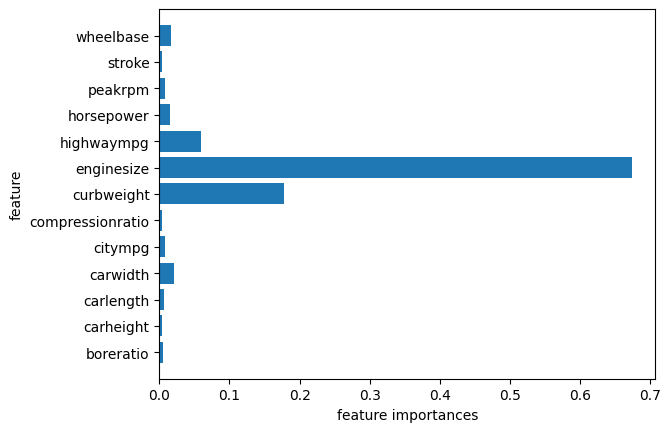

In [ ]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
columns_nm = feature

plt.barh(range(n_features), importances, align = 'center')
plt.yticks(np.arange(n_features), columns_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()